df = pd.read_csv('df_pos.csv', index_col=0)
df = df.drop('player_name', axis=1)

df_nf = df.drop('follower', axis=1)

df

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

df['const'] = np.ones(df.shape[0])
df_X = df.drop('value', axis=1)
df_X = pd.DataFrame(StandardScaler().fit_transform(df_X), columns=df.drop('value', axis=1).columns)

# 자료형을 float로 통일
X = tf.constant(df_X.values, dtype=tf.float32)
y_target = tf.constant(np.array(df.value).reshape(-1, 1), dtype=tf.float32)

# 가중치 변수
w = tf.Variable(tf.zeros((X.shape[1], 1)))

def model_predict(X):
    return tf.matmul(X, w)

optimizer = keras.optimizers.SGD(learning_rate=6e-9)

def train_step(X, y_target):
    with tf.GradientTape() as tape:
        y_predict = model_predict(X)
        loss = tf.reduce_sum(tf.square(y_target - y_predict))
    
    gradient = tape.gradient(loss, w)
    optimizer.apply_gradients([(gradient, w)])
    return loss

for i in range(1000000):
    loss_value = train_step(X, y_target)
    if (i % 50000 == 0):
        print(f"[{i:05d}] loss: {loss_value:10.3f}")

predictions = model_predict(X)
plt.scatter(np.array(df.value), predictions)
plt.xlabel(u"실제 몸값")
plt.ylabel(u"몸값 예측치")
plt.title("몸값 예측치와 실제 몸값의 관계")
plt.show()

In [17]:
df = pd.read_csv('df_pos.csv', index_col=0)

In [18]:
pd.options.display.max_columns = len(df.columns)

In [19]:
df

,player_name,position,age,height,weight,rating,value,follower,shots_total,shots_on,goals_total,goals_conceded,goals_assists,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_won,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
0,A. Anguissa,2.000000,25.000000,184.000000,78.000000,2.333333,20.0,67879,0.5540,0.1288,0.0129,0.0,0.0000,22.1875,0.2706,3.2985,1.2112,0.1417,0.8504,3.4402,1.6621,1.4431,1.1467,0.5283,0.7473,0.1804,0.0129,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1.4044,0.9277,0.4767,0.2577,0.5927,77.6111
1,A. Belotti,4.000000,27.000000,181.000000,72.000000,5.250000,32.0,740918,2.8168,1.0538,0.4432,0.0,0.0985,12.3211,0.9554,4.0184,0.4629,0.0985,0.2659,12.3211,5.6829,1.9304,0.9947,2.8562,1.7039,0.1083,0.0000,0.0000,0.0394,0.0000,0.0985,0.0295,0.0,1.0538,0.9947,0.0591,0.0689,0.0689,101.5333
2,A. Christensen,3.000000,24.000000,188.000000,78.000000,6.000000,24.0,601838,0.3802,0.0613,0.0000,0.0,0.0123,58.0175,0.1717,13.4528,1.0301,0.3802,1.3367,6.4627,4.1940,0.1594,0.1594,0.5641,0.5886,0.0981,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1.1160,1.0056,0.1104,0.1839,0.7603,81.5444
3,A. Correa,4.000000,25.000000,171.000000,70.000000,7.000000,32.0,652886,1.9736,0.8442,0.2282,0.0,0.2168,23.4897,1.5287,9.1609,0.7758,0.1141,0.9355,12.5833,5.0082,4.4378,2.5440,1.6086,1.6542,0.2738,0.0114,0.0114,0.0114,0.0114,0.0000,0.0000,0.0,1.5515,0.9697,0.5818,0.6731,0.6160,87.6556
4,A. Di MarÃ­a,2.000000,32.000000,180.000000,75.000000,4.833333,32.0,11513791,3.0823,1.1138,0.4705,0.0,0.3745,32.2437,2.2277,6.1453,0.4321,0.0480,0.4225,4.3785,1.7380,3.2455,1.6804,0.6433,0.4225,0.0960,0.0000,0.0000,0.0096,0.0192,0.0096,0.0096,0.0,1.2003,1.0754,0.1248,0.5857,0.2401,104.1444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,W. Zaha,4.000000,28.000000,180.000000,66.000000,3.888889,44.0,1028085,2.0280,0.7120,0.2373,0.0,0.1187,21.4995,1.4779,4.2611,1.1758,0.0216,0.3452,18.3819,8.4358,7.0011,4.0453,3.0097,1.4671,0.2050,0.0108,0.0000,0.1187,0.0000,0.0000,0.0000,0.0,1.0248,0.9924,0.0324,0.0647,0.0324,92.7000
367,Wesley,3.769231,23.076923,188.230769,86.769231,1.615385,24.0,57900,0.4836,0.2579,0.3761,0.0,0.0107,4.1158,0.2042,2.3642,0.1397,0.0215,0.0430,0.9994,0.4299,0.3224,0.1612,0.2794,0.5803,0.1612,0.0000,0.0107,0.0000,0.0000,0.0000,0.0107,0.0,1.2143,1.0531,0.1612,0.5158,0.3116,93.0556
368,Willian,4.000000,32.000000,175.000000,77.000000,6.153846,22.5,8983450,2.5586,0.9795,0.2798,0.0,0.2798,38.4786,3.0083,8.6552,0.7696,0.0300,0.5297,8.1555,4.2876,4.0677,2.8384,1.6691,0.6396,0.0800,0.0000,0.0000,0.0500,0.0000,0.0500,0.0000,0.0,1.4592,1.0294,0.4298,0.5397,0.5197,100.0556
369,Y. Poulsen,4.000000,26.000000,192.000000,84.000000,6.545455,24.0,109000,2.0141,0.7524,0.3357,0.0,0.2662,16.8656,1.2039,7.4315,0.3936,0.0695,0.3010,14.2611,6.6791,1.9563,0.9260,1.8637,1.7595,0.1042,0.0000,0.0000,0.0463,0.0000,0.0116,0.0000,0.0,1.4006,0.9492,0.4514,0.2894,0.5788,86.3889


In [20]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['player_name', 'value'], axis = 1)
y = df.value
df_scaled = MinMaxScaler().fit_transform(X)

In [21]:
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)

In [22]:
df_scaled

,position,age,height,weight,rating,follower,shots_total,shots_on,goals_total,goals_conceded,goals_assists,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_won,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
0,0.333333,0.333333,0.924623,0.780000,0.165354,0.000306,0.094303,0.047580,0.013084,0.0,0.000000,0.248271,0.074052,0.121452,0.315384,0.107073,0.357611,0.160049,0.160185,0.157360,0.214100,0.103515,0.296089,0.353518,0.304245,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.473938,0.215801,0.490988,0.317130,0.412138,0.103653
1,1.000000,0.466667,0.909548,0.720000,0.578740,0.003336,0.479480,0.389287,0.449538,0.0,0.195825,0.123654,0.261453,0.159339,0.120534,0.074429,0.111817,0.573216,0.547691,0.210496,0.185720,0.604289,0.675106,0.212228,0.000000,0.000000,0.331929,0.000000,0.441111,0.504274,0.0,0.071412,0.518284,0.060871,0.084790,0.042927,0.195002
2,0.666667,0.266667,0.944724,0.780000,0.685039,0.002710,0.064718,0.022645,0.000000,0.0,0.024453,0.700818,0.046987,0.655860,0.268227,0.287290,0.562111,0.300665,0.404198,0.017381,0.029762,0.111216,0.233211,0.192240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142824,0.567494,0.113709,0.226311,0.530274,0.118673
3,1.000000,0.333333,0.859296,0.700000,0.826772,0.002940,0.335949,0.311858,0.231464,0.0,0.431014,0.264718,0.418341,0.429983,0.202010,0.086217,0.393398,0.585414,0.482667,0.483911,0.474990,0.335908,0.655414,0.536547,0.268868,0.304813,0.096040,0.200000,0.000000,0.000000,0.0,0.642824,0.405418,0.599238,0.828329,0.428561,0.142009
4,0.333333,0.800000,0.904523,0.750000,0.519685,0.051839,0.524674,0.411452,0.477229,0.0,0.744533,0.375284,0.609627,0.271275,0.112514,0.036270,0.177670,0.203701,0.167500,0.353899,0.313747,0.128254,0.167400,0.188125,0.000000,0.000000,0.080876,0.336842,0.042991,0.164103,0.0,0.239610,0.882619,0.128541,0.720773,0.163600,0.204972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,1.000000,0.533333,0.904523,0.660000,0.385827,0.004629,0.345209,0.263022,0.240694,0.0,0.235984,0.239581,0.404439,0.172112,0.306166,0.016322,0.145164,0.855183,0.813003,0.763420,0.755298,0.637310,0.581283,0.401724,0.254717,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.038117,0.507901,0.033371,0.079621,0.017199,0.161271
367,0.923077,0.205128,0.945883,0.867692,0.063598,0.000261,0.082319,0.095272,0.381479,0.0,0.021272,0.020018,0.055881,0.072280,0.036376,0.016246,0.018082,0.046495,0.041432,0.035155,0.030098,0.049972,0.229922,0.315893,0.000000,0.286096,0.000000,0.000000,0.000000,0.182906,0.0,0.255683,0.781941,0.166032,0.634753,0.213999,0.162629
368,1.000000,0.800000,0.879397,0.770000,0.706844,0.040447,0.435529,0.361840,0.283802,0.0,0.556262,0.454034,0.823244,0.403368,0.200396,0.022669,0.222750,0.379419,0.413219,0.443554,0.529958,0.348922,0.253417,0.156771,0.000000,0.000000,0.421230,0.000000,0.223914,0.000000,0.0,0.536854,0.674944,0.442682,0.664164,0.360682,0.189359
369,1.000000,0.400000,0.964824,0.840000,0.762348,0.000491,0.342843,0.277946,0.340501,0.0,0.529225,0.181053,0.329457,0.338966,0.102489,0.052516,0.126577,0.663471,0.643700,0.213321,0.172893,0.390784,0.697135,0.204194,0.000000,0.000000,0.390059,0.000000,0.051948,0.000000,0.0,0.469575,0.312867,0.464929,0.356141,0.402340,0.137172


In [23]:
df_scaled.to_csv("df_scaled.csv", encoding="utf-8")

In [24]:
df = pd.concat([df_scaled, y], axis=1)

In [25]:
df

,position,age,height,weight,rating,follower,shots_total,shots_on,goals_total,goals_conceded,goals_assists,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_won,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played,value
0,0.333333,0.333333,0.924623,0.780000,0.165354,0.000306,0.094303,0.047580,0.013084,0.0,0.000000,0.248271,0.074052,0.121452,0.315384,0.107073,0.357611,0.160049,0.160185,0.157360,0.214100,0.103515,0.296089,0.353518,0.304245,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.473938,0.215801,0.490988,0.317130,0.412138,0.103653,20.0
1,1.000000,0.466667,0.909548,0.720000,0.578740,0.003336,0.479480,0.389287,0.449538,0.0,0.195825,0.123654,0.261453,0.159339,0.120534,0.074429,0.111817,0.573216,0.547691,0.210496,0.185720,0.604289,0.675106,0.212228,0.000000,0.000000,0.331929,0.000000,0.441111,0.504274,0.0,0.071412,0.518284,0.060871,0.084790,0.042927,0.195002,32.0
2,0.666667,0.266667,0.944724,0.780000,0.685039,0.002710,0.064718,0.022645,0.000000,0.0,0.024453,0.700818,0.046987,0.655860,0.268227,0.287290,0.562111,0.300665,0.404198,0.017381,0.029762,0.111216,0.233211,0.192240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142824,0.567494,0.113709,0.226311,0.530274,0.118673,24.0
3,1.000000,0.333333,0.859296,0.700000,0.826772,0.002940,0.335949,0.311858,0.231464,0.0,0.431014,0.264718,0.418341,0.429983,0.202010,0.086217,0.393398,0.585414,0.482667,0.483911,0.474990,0.335908,0.655414,0.536547,0.268868,0.304813,0.096040,0.200000,0.000000,0.000000,0.0,0.642824,0.405418,0.599238,0.828329,0.428561,0.142009,32.0
4,0.333333,0.800000,0.904523,0.750000,0.519685,0.051839,0.524674,0.411452,0.477229,0.0,0.744533,0.375284,0.609627,0.271275,0.112514,0.036270,0.177670,0.203701,0.167500,0.353899,0.313747,0.128254,0.167400,0.188125,0.000000,0.000000,0.080876,0.336842,0.042991,0.164103,0.0,0.239610,0.882619,0.128541,0.720773,0.163600,0.204972,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,1.000000,0.533333,0.904523,0.660000,0.385827,0.004629,0.345209,0.263022,0.240694,0.0,0.235984,0.239581,0.404439,0.172112,0.306166,0.016322,0.145164,0.855183,0.813003,0.763420,0.755298,0.637310,0.581283,0.401724,0.254717,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.038117,0.507901,0.033371,0.079621,0.017199,0.161271,44.0
367,0.923077,0.205128,0.945883,0.867692,0.063598,0.000261,0.082319,0.095272,0.381479,0.0,0.021272,0.020018,0.055881,0.072280,0.036376,0.016246,0.018082,0.046495,0.041432,0.035155,0.030098,0.049972,0.229922,0.315893,0.000000,0.286096,0.000000,0.000000,0.000000,0.182906,0.0,0.255683,0.781941,0.166032,0.634753,0.213999,0.162629,24.0
368,1.000000,0.800000,0.879397,0.770000,0.706844,0.040447,0.435529,0.361840,0.283802,0.0,0.556262,0.454034,0.823244,0.403368,0.200396,0.022669,0.222750,0.379419,0.413219,0.443554,0.529958,0.348922,0.253417,0.156771,0.000000,0.000000,0.421230,0.000000,0.223914,0.000000,0.0,0.536854,0.674944,0.442682,0.664164,0.360682,0.189359,22.5
369,1.000000,0.400000,0.964824,0.840000,0.762348,0.000491,0.342843,0.277946,0.340501,0.0,0.529225,0.181053,0.329457,0.338966,0.102489,0.052516,0.126577,0.663471,0.643700,0.213321,0.172893,0.390784,0.697135,0.204194,0.000000,0.000000,0.390059,0.000000,0.051948,0.000000,0.0,0.469575,0.312867,0.464929,0.356141,0.402340,0.137172,24.0


[00000] loss: 652000.750
[50000] loss: 213179.094
[100000] loss: 175172.312
[150000] loss: 170544.703
[200000] loss: 168776.172
[250000] loss: 167323.969
[300000] loss: 165970.953
[350000] loss: 164685.281
[400000] loss: 163477.344
[450000] loss: 162318.312
[500000] loss: 161226.172
[550000] loss: 160172.000
[600000] loss: 159166.344
[650000] loss: 158217.594
[700000] loss: 157311.453
[750000] loss: 156441.859
[800000] loss: 155600.531
[850000] loss: 154785.828
[900000] loss: 154008.375
[950000] loss: 153264.109
[1000000] loss: 152539.828
[1050000] loss: 151836.797
[1100000] loss: 151160.859
[1150000] loss: 150510.984
[1200000] loss: 149879.453
[1250000] loss: 149257.516
[1300000] loss: 148655.797
[1350000] loss: 148078.531
[1400000] loss: 147513.125
[1450000] loss: 146968.703
[1500000] loss: 146437.531
[1550000] loss: 145915.422
[1600000] loss: 145406.656
[1650000] loss: 144921.141
[1700000] loss: 144447.484
[1750000] loss: 143981.797
[1800000] loss: 143528.156
[1850000] loss: 143080.

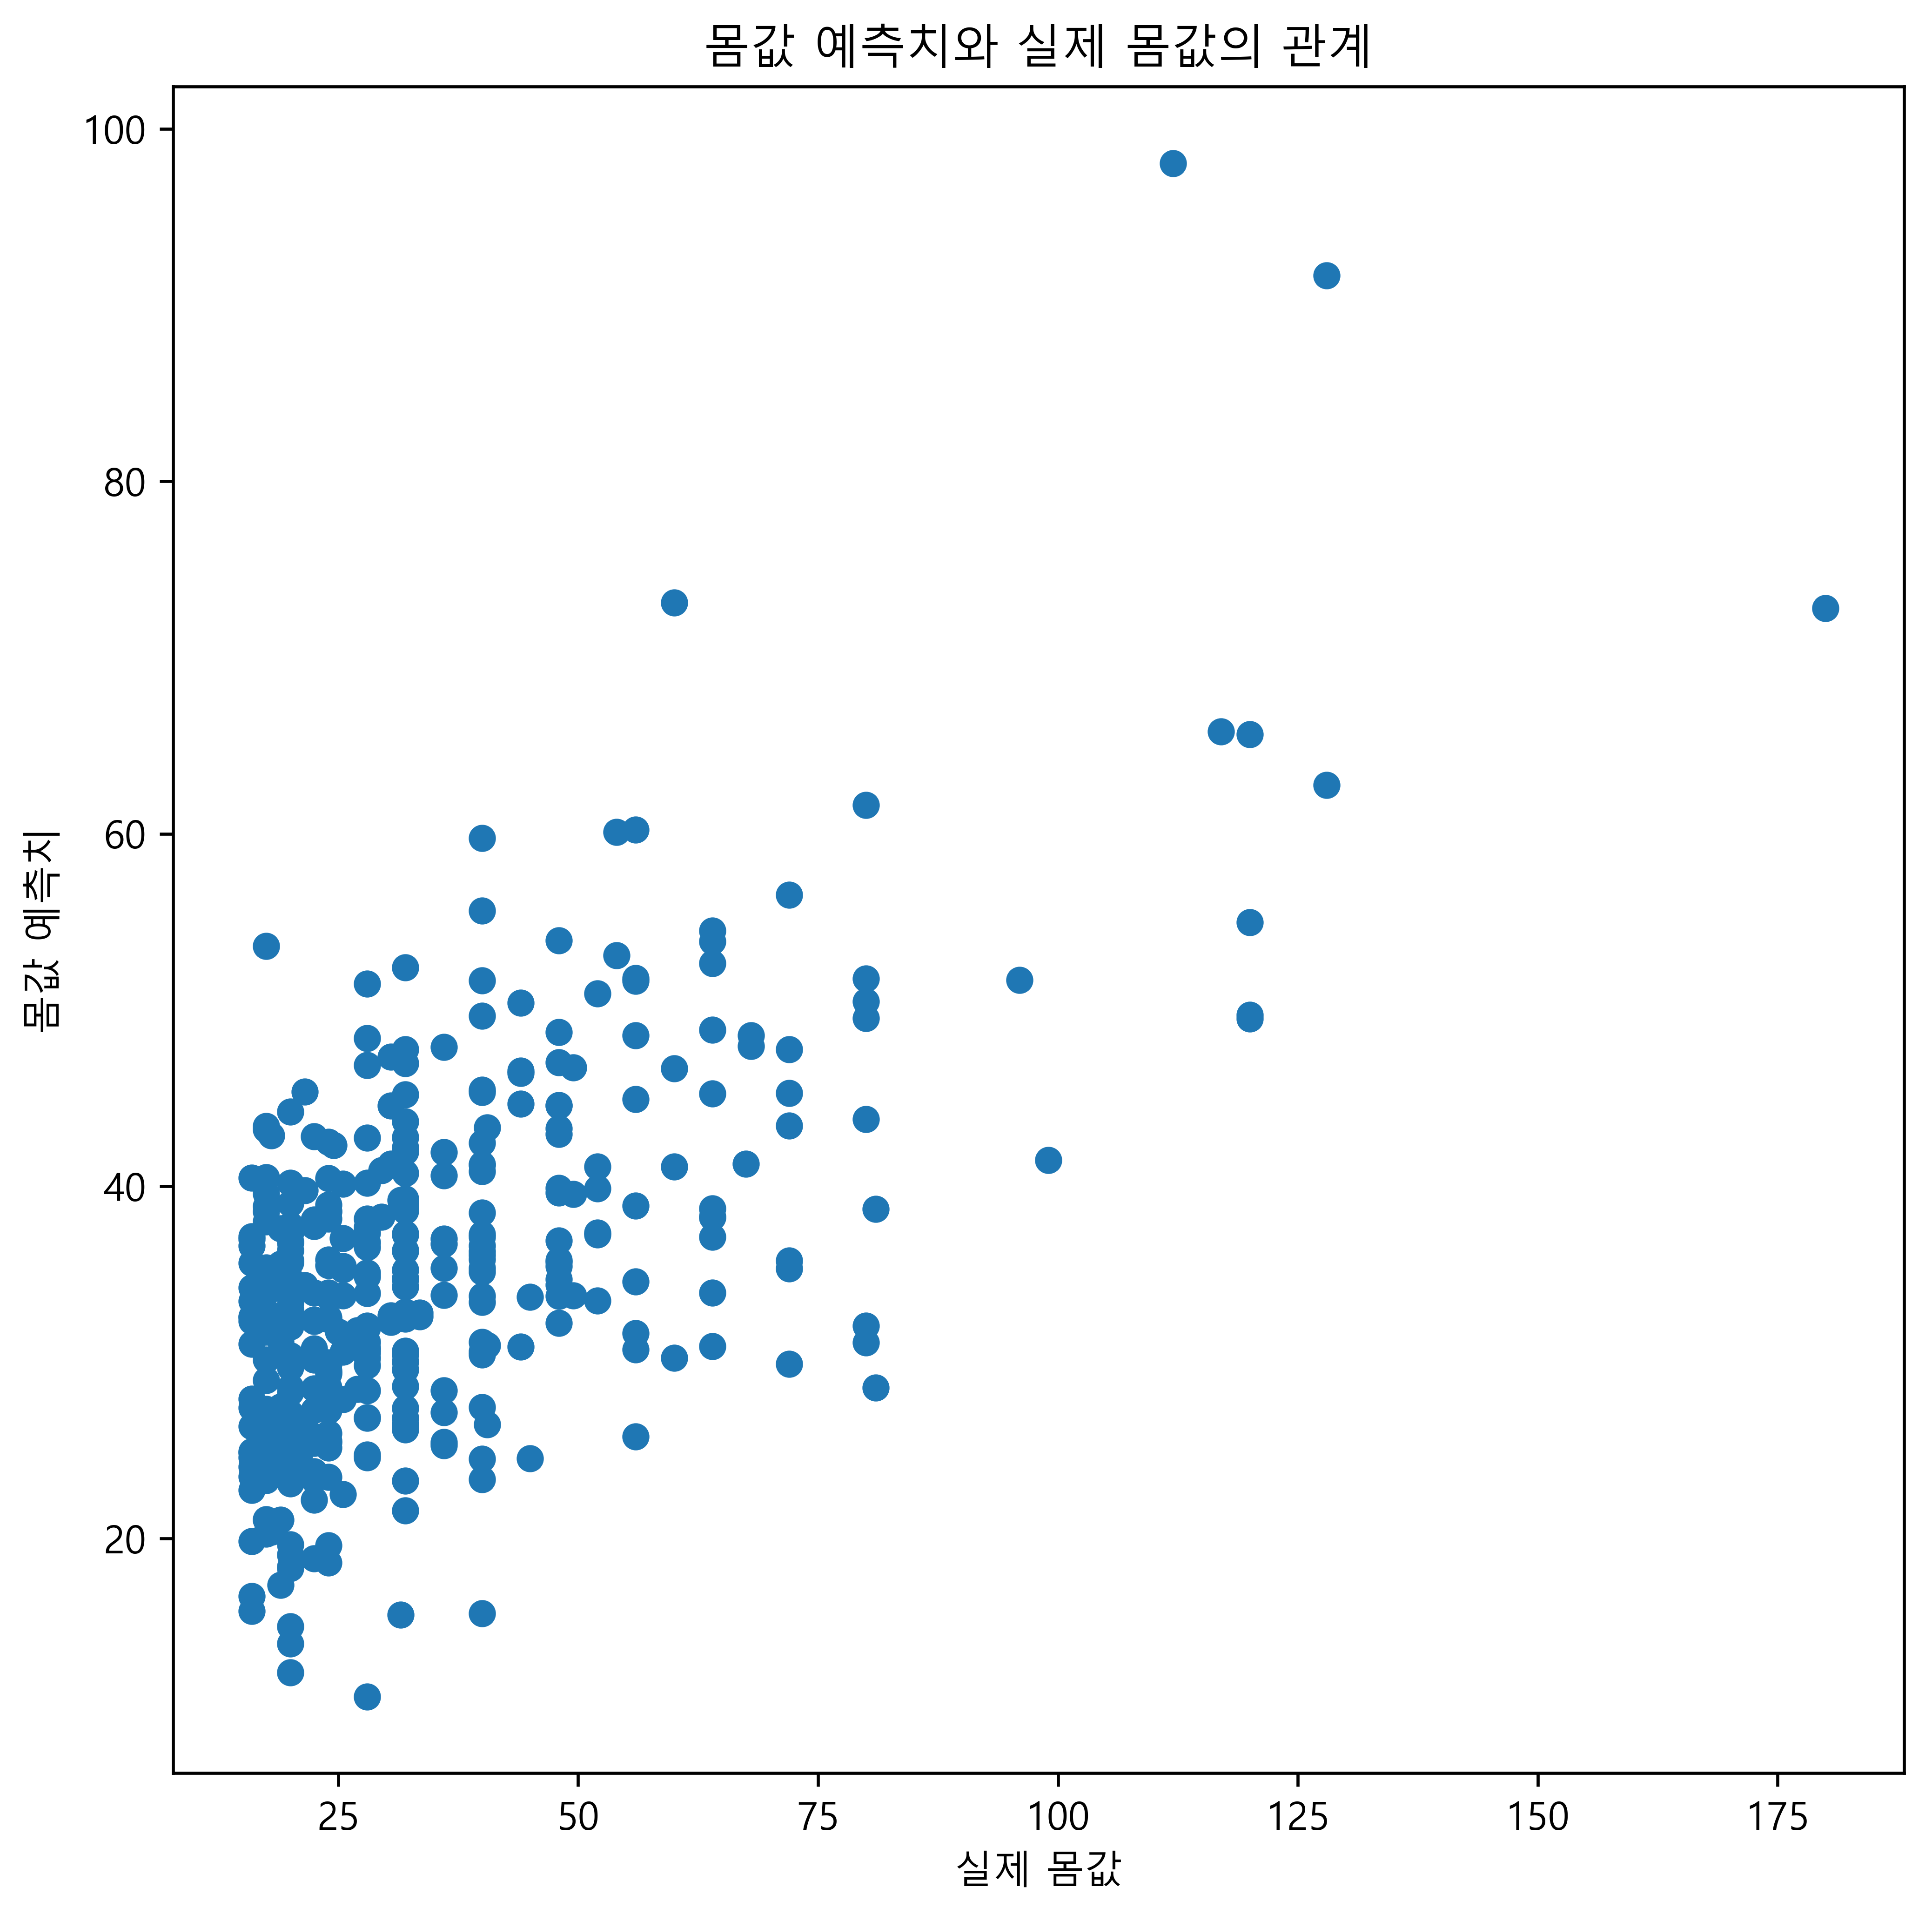

In [26]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

df['const'] = np.ones(df.shape[0])
df_X = df.drop('value', axis=1)

# 자료형을 float로 통일
X = tf.constant(df_X.values, dtype=tf.float32)
y_target = tf.constant(np.array(df.value).reshape(-1, 1), dtype=tf.float32)

# 가중치 변수
w = tf.Variable(tf.zeros((X.shape[1], 1)))

def model_predict(X):
    return tf.matmul(X, w)

optimizer = keras.optimizers.SGD(learning_rate=6e-9)

def train_step(X, y_target):
    with tf.GradientTape() as tape:
        y_predict = model_predict(X)
        loss = tf.reduce_sum(tf.square(y_target - y_predict))
    
    gradient = tape.gradient(loss, w)
    optimizer.apply_gradients([(gradient, w)])
    return loss

for i in range(10000000):
    loss_value = train_step(X, y_target)
    if (i % 500000 == 0):
        print(f"[{i:08d}] loss: {loss_value:10.3f}")

predictions = model_predict(X)
plt.scatter(np.array(df.value), predictions)
plt.xlabel(u"실제 몸값")
plt.ylabel(u"몸값 예측치")
plt.title("몸값 예측치와 실제 몸값의 관계")
plt.show()

[00000] loss: 652000.750
[50000] loss: 213294.094
[100000] loss: 175331.859
[150000] loss: 170747.891
[200000] loss: 169021.266
[250000] loss: 167609.797
[300000] loss: 166294.672
[350000] loss: 165044.938
[400000] loss: 163871.312
[450000] loss: 162747.594
[500000] loss: 161687.719
[550000] loss: 160664.359
[600000] loss: 159684.875
[650000] loss: 158759.750
[700000] loss: 157882.031
[750000] loss: 157039.328
[800000] loss: 156224.625
[850000] loss: 155439.188
[900000] loss: 154680.312
[950000] loss: 153956.906


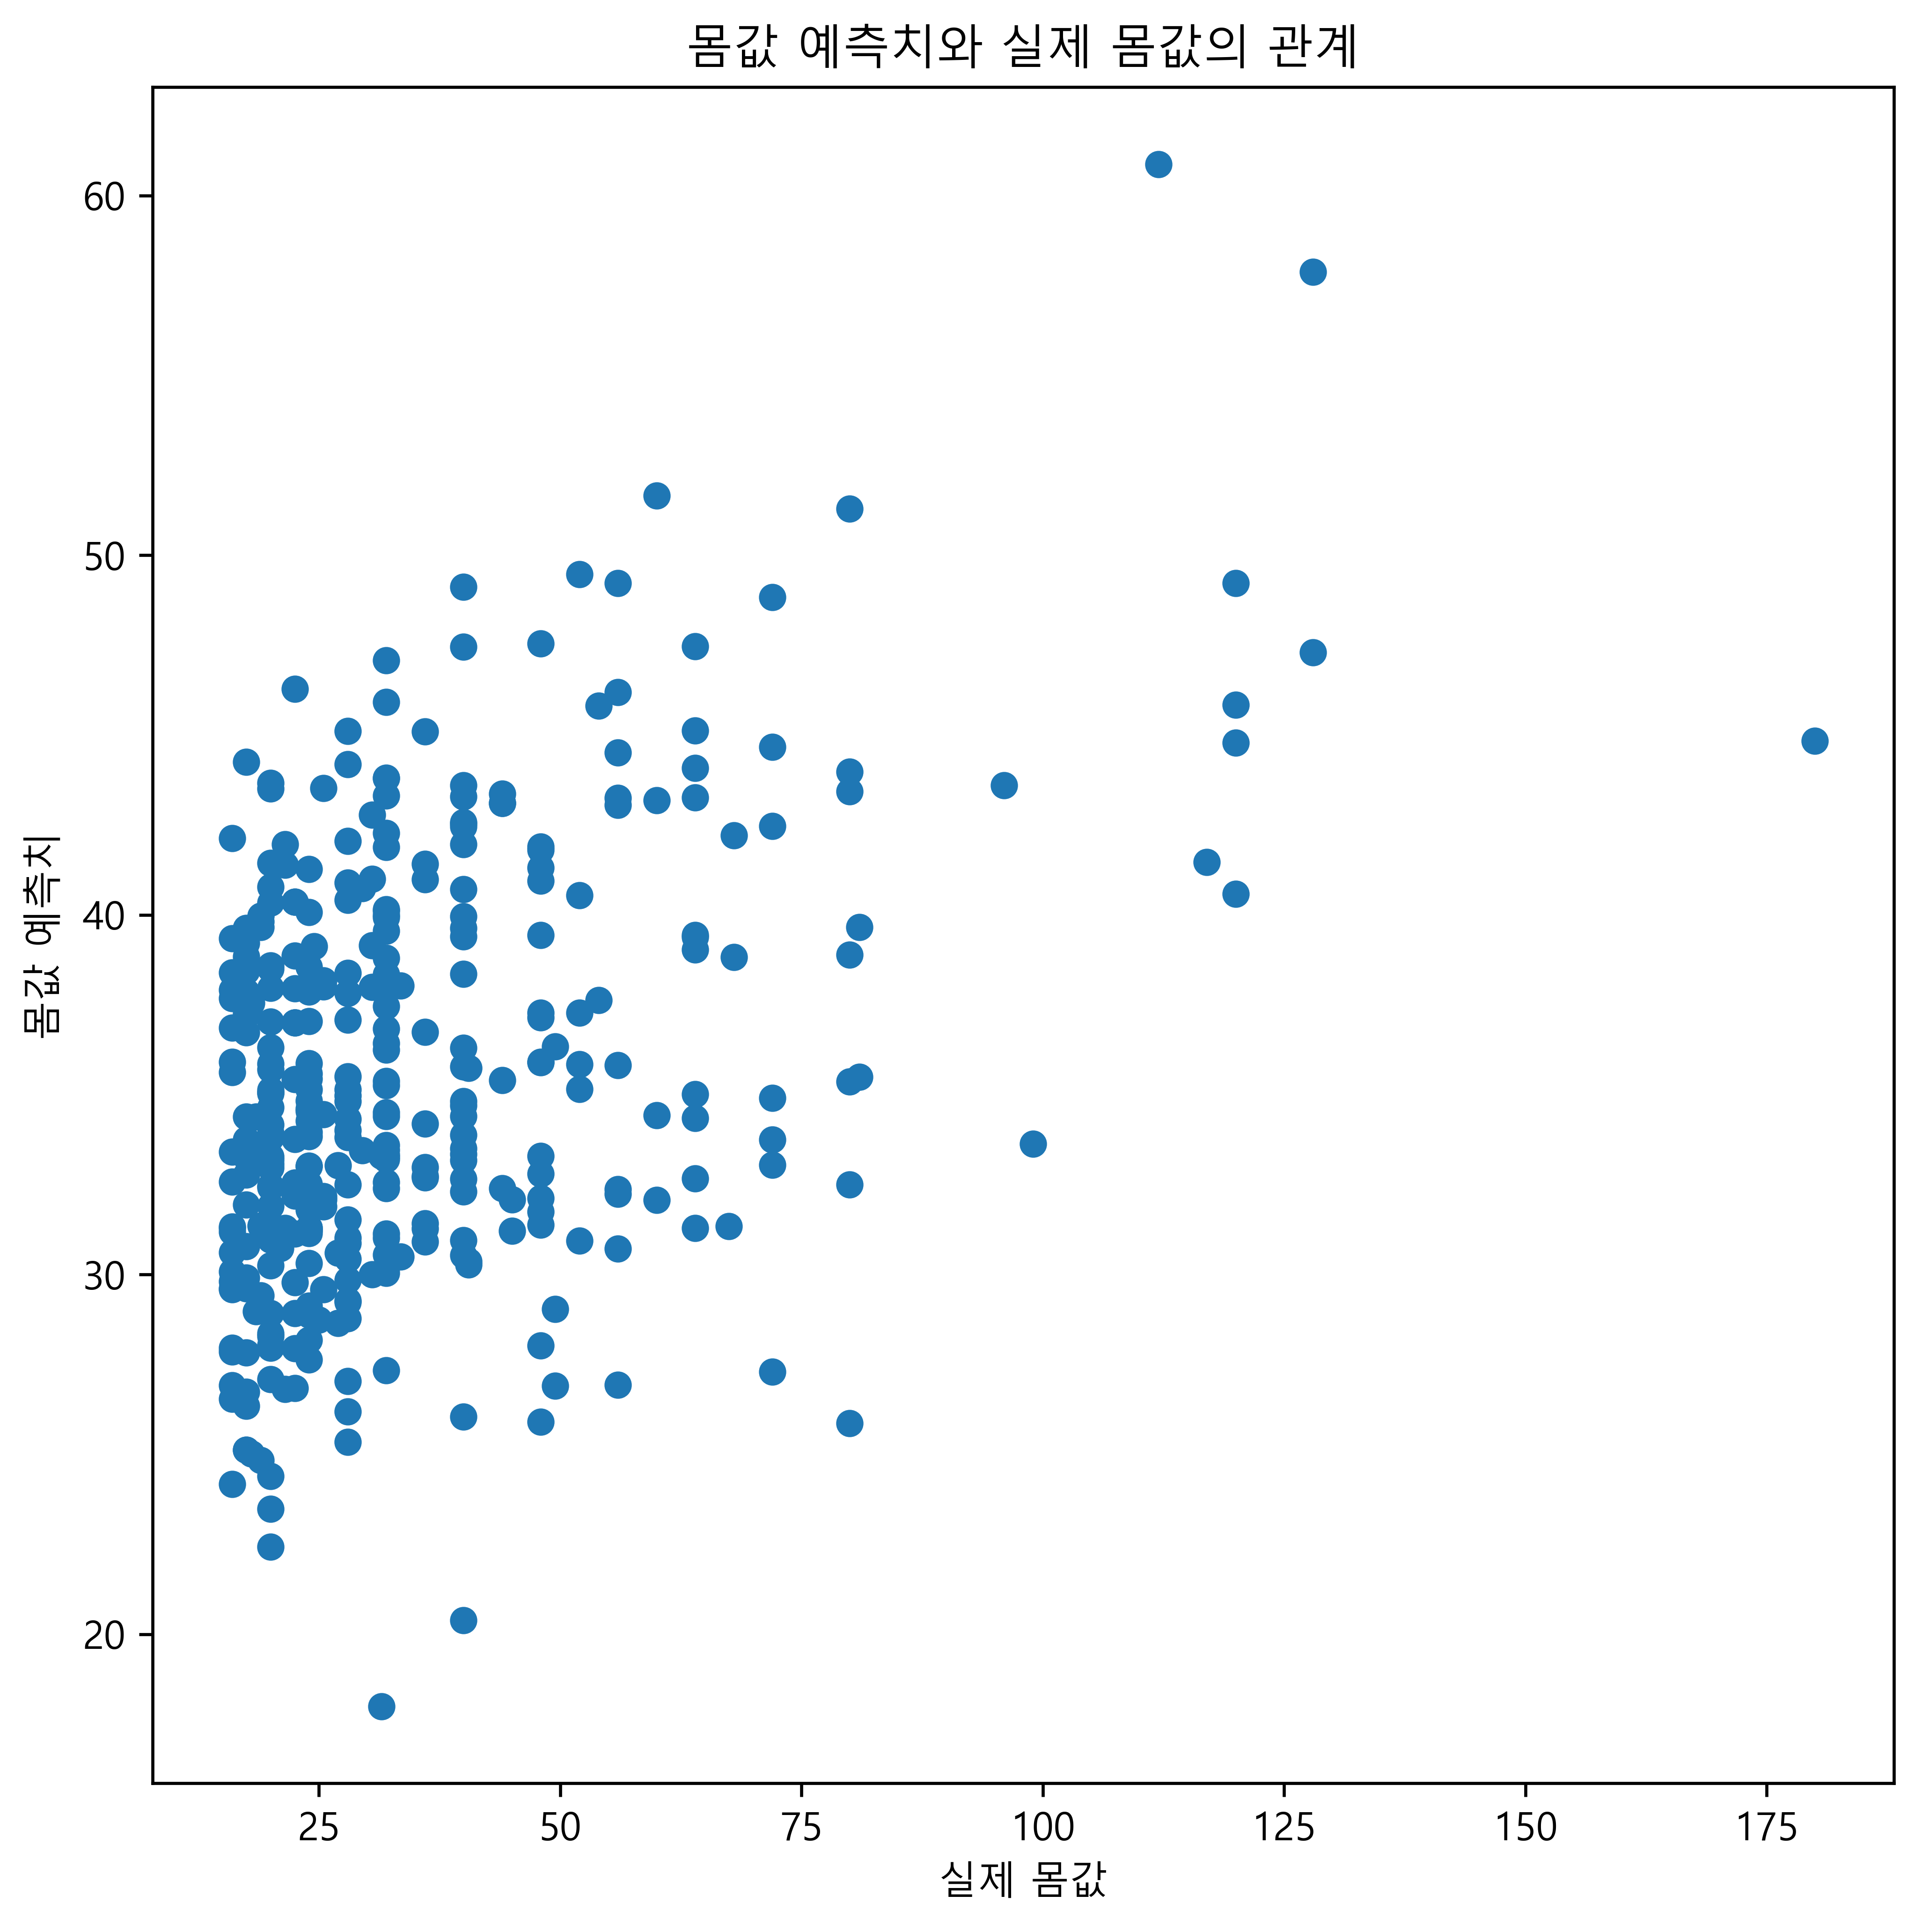

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

df['const'] = np.ones(df.shape[0])
df_X = df.drop(['value', 'follower'], axis=1)

# 자료형을 float로 통일
X = tf.constant(df_X.values, dtype=tf.float32)
y_target = tf.constant(np.array(df.value).reshape(-1, 1), dtype=tf.float32)

# 가중치 변수
w = tf.Variable(tf.zeros((X.shape[1], 1)))

def model_predict(X):
    return tf.matmul(X, w)

optimizer = keras.optimizers.SGD(learning_rate=6e-9)

def train_step(X, y_target):
    with tf.GradientTape() as tape:
        y_predict = model_predict(X)
        loss = tf.reduce_sum(tf.square(y_target - y_predict))
    
    gradient = tape.gradient(loss, w)
    optimizer.apply_gradients([(gradient, w)])
    return loss

for i in range(1000000):
    loss_value = train_step(X, y_target)
    if (i % 50000 == 0):
        print(f"[{i:05d}] loss: {loss_value:10.3f}")

predictions = model_predict(X)
plt.scatter(np.array(df.value), predictions)
plt.xlabel(u"실제 몸값")
plt.ylabel(u"몸값 예측치")
plt.title("몸값 예측치와 실제 몸값의 관계")
plt.show()